<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

* [1. Libraries](#1)
* [2.Idea about the data](#2)
* [3.Exploratory data analysis](#3)
    - [3.1 How many resturant accept online orders ?](#3.1)
    - [3.2 How many resturant have Book Table?](#3.2)
    - [3.3 Which type of resturants are from thr top ten in Bangolre ?](#3.3)
    - [3.4 What are the main cuisine types available in Bengaluru ?](#3.4)
    - [3.5 What is the range of apporoxiamte cost for two person for each resturant ?](#3.5)
    - [3.6 What are the most popular restaurants?](#3.6)
    - [3.7 What is the effect of Book table on rate and cost ?](#3.7)
    - [3.8 Where are the best resturants ?](#3.8)
    - [3.9 How are rate and cost affect on choosing best city to eat in it ?](#3.9)
    - [3.10 Heatmap of restaurant count on each location](#3.10)
* [4. Data Preperation](#4)
    - [4.1 Clean Data](#4.1)
    - [4.2 Feature Selection and Extarction](#4.2)
        - [4.2.1 Label Enconding](#4.3)
* [5. Machine Learning model](#5)
    - [5.1 Select best machine learning for binary classification](#5.1)
    - [5.2 Parameter tuning](#5.2)
    - [5.3 Evalution and mertcis](#5.3)
* [6.Summary](#5)
    

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Libraries</b></font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from collections import Counter


<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Idea about the data</b></font>

In [3]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.iloc[51712]

url                            https://www.zomato.com/bangalore/best-brews-fo...
address                        Four Points by Sheraton Bengaluru, 43/3, White...
name                           Best Brews - Four Points by Sheraton Bengaluru...
online_order                                                                  No
book_table                                                                    No
rate                                                                      3.6 /5
votes                                                                         27
phone                                                               080 40301477
location                                                              Whitefield
rest_type                                                                    Bar
dish_liked                                                                   NaN
cuisines                                                             Continental
approx_cost(for two people) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

Dataset contains 51717 rows and 17 columns

**Column Descrbtion**<br>
* **url** : zomato url for the restaurants
* **address** : complete location of the restaurant
* **name** : name of the restaurant
* **online_order** : whether restaurant accepts online order
* **book_table** : whether restaurant provides option for booking table
* **rate** : restaurants rating on zomato website
* **votes** : number of individual who voted for restaurants
* **phone** : contact details of the restaurant
* **location** : area where restaurant is situated
* **rest_type** : Type of restaurants (Categorical value)
* **dish_liked** :  what are all dishes of the restaurant that people liked
* **cuisines** :  cuisines offered by the restaurant
* **approx_cost(for two people)** :  average cost for two people
* **review_list** :  reviews of the restaurant on zomato website
* **menu_item** :  menu items available in the restaurant
* **listed_in(type)** :  type of the restaurant
* **listed_in(city)** :  locality of the restaurant position


In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df['approx_cost'] =df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
df['approx_cost'] = df['approx_cost'].astype(float)

* Correct data type of approx_cost

In [8]:
df['rate_num'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0])
while True:
    try:
        df['rate_num'] = df['rate_num'].astype(float)
        break
    except ValueError as e1:
        noise_entry = str(e1).split(":")[-1].strip().replace("'", "")
        print(f'Threating noisy entrance on rate: {noise_entry}')
        df['rate_num'] = df['rate_num'].apply(lambda x: x.replace(noise_entry, str(np.nan)))

# Dropping old column
df.drop(['approx_cost(for two people)', 'rate'], axis=1, inplace=True)

Threating noisy entrance on rate: NEW
Threating noisy entrance on rate: -


* clean rate column " tranfer it from n/5 to n

In [9]:
df.describe()

,votes,approx_cost,rate_num
count,51717.000000,51371.000000,41665.000000
mean,283.697527,555.431566,3.700449
std,803.838853,438.850728,0.440513
min,0.000000,40.000000,1.800000
25%,7.000000,300.000000,3.400000
50%,41.000000,400.000000,3.700000
75%,198.000000,650.000000,4.000000
max,16832.000000,6000.000000,4.900000



<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Exploratory data analysis</b></font>


<a id="3.1"></a>
<font color="dimgrey" size=+2.0><b>3.1 How many restaurant accept online orders ?</b></font>


In [10]:
colors = sns.color_palette()
def piechart (title,col):
    plt.title(title)
    plt.pie(df[col].value_counts(),labels=['Yes','No'],colors=colors,autopct = '%0.0f%%')
    plt.legend()
    plt.show()

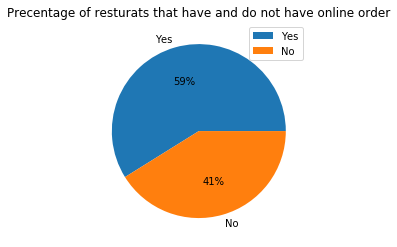

In [11]:
piechart('Precentage of resturats that have and do not have online order','online_order')


* Only 59% from the restaurants have online orders


<a id="3.2"></a>
<font color="dimgrey" size=+2.0><b>3.2 How many restaurant have Book Table?</b></font>



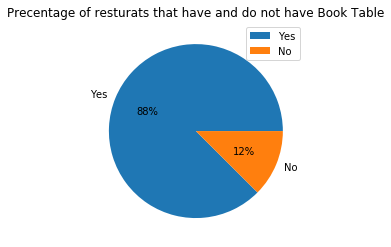

In [12]:
piechart('Precentage of resturats that have and do not have Book Table','book_table')


* Most of the restaurants have a book table


<a id="3.3"></a>
<font color="dimgrey" size=+2.0><b>3.3 Which type of restaurants are from the top ten in Bengaluru ? </b></font>


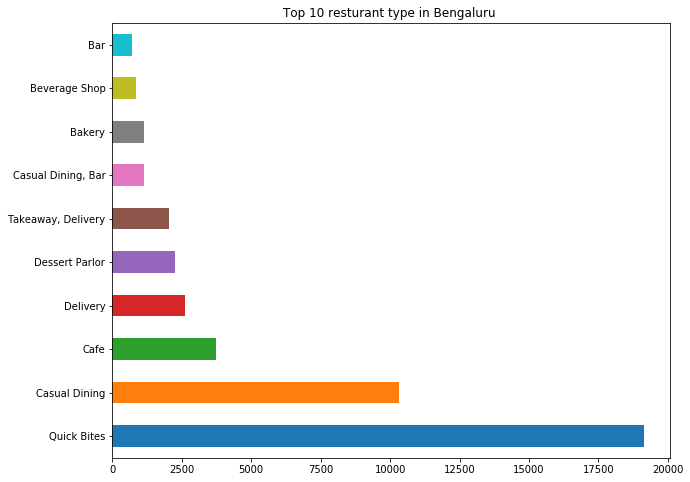

In [13]:

plt.figure(figsize=(10,8))
plt.title('Top 10 resturant type in Bengaluru ')
df['rest_type'].value_counts()[:10].plot(kind='barh',color=colors);
plt.show();

* There are 93 different type of restaurants
* People in Bengaluru prefer Quick Bites's resturant type<br>
* Quick Bite and Casual Dinning are the most dominate type of resturant


<a id="3.4"></a>
<font color="dimgrey" size=+2.0><b>3.4 What are the main cuisine types available in Bengaluru ?</b></font>



In [13]:
# Creating a list of all cuisine option
cuisines_type = df['cuisines'].astype(str).values
cuisine_unique_list=[]
for i in [c.split(',') for c in cuisines_type ]:
    for  word in i:
        cuisine_unique_list.append(word.strip())

In [14]:
# creating unique type for cuisines
cuisine_unique_dict = Counter(cuisine_unique_list)
# creating DataFrame for cuisisnes type
df_cuisine = pd.DataFrame()
df_cuisine['cuisines']=cuisine_unique_dict.keys()
df_cuisine['amount']=cuisine_unique_dict.values()

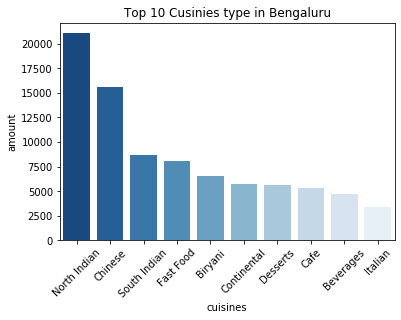

In [15]:
df_cuisine.sort_values(by='amount', ascending=False, inplace=True)
sns.barplot(x='cuisines', y='amount', data=df_cuisine.head(10), palette='Blues_r')
plt.title('Top 10 Cusinies type in Bengaluru')
plt.xticks(rotation=45)
plt.show();

* **North Indian's Cuisine** is the most common type in bengaluru


<a id="3.5"></a>
<font color="dimgrey" size=+2.0><b>3.5 What is the range of approximate cost for two person for each restaurant ?</b></font>



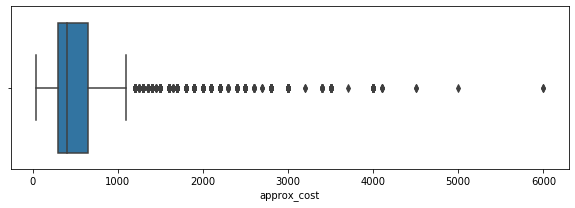

In [16]:
plt.figure(figsize=(10,3))
sns.boxplot(df['approx_cost'].dropna())
plt.show()

* Almost 90% of restaurant cost for two person is less than 1000 INR. (237 LE)

<a id="3.6"></a>
<font color="dimgrey" size=+2.0><b>3.6 What are the most popular restaurants ?</b></font>



To answer this question,we are grouping the data by each resturant name then we will show the popular resturants according to how many votes it takes? ,how much is it cost? and number of its branches

In [17]:
popular_branchies=df.groupby(by='name',as_index=False).agg({'votes':'sum',
                                                           'url':'count',
                                                           'approx_cost':'mean'})
popular_branchies.columns = ['name', 'total_votes', 'total_branchies', 'mean_approx_cost']
popular_branchies = popular_branchies.sort_values(by='total_branchies', ascending=False)
popular_branchies = popular_branchies.loc[:, ['name', 'total_branchies', 'total_votes',
                                                'mean_approx_cost']]

* number of each branches were counted by counting number of url for each restaurant

In [18]:
popular_branchies.head(10)

,name,total_branchies,total_votes,mean_approx_cost
1320,Cafe Coffee Day,96,3089,844.791667
5549,Onesta,85,347520,600.000000
3788,Just Bake,73,2898,400.000000
2446,Empire Restaurant,71,229808,685.211268
2577,Five Star Chicken,70,3134,257.857143
3958,Kanti Sweets,68,7336,400.000000
5790,Petoo,66,4242,659.848485
5840,Polar Bear,65,8121,361.538462
827,Baskin Robbins,64,2487,251.562500
1655,Chef Baker's,62,5073,516.071429


Put this in function

Text(0, 0.5, 'Number of branchies')

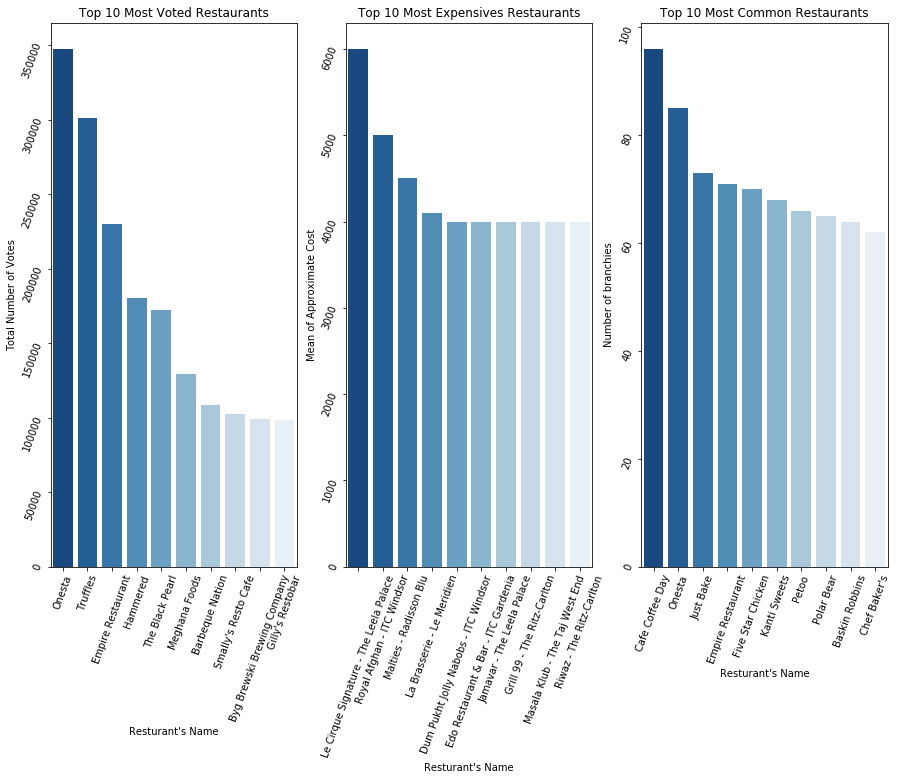

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15,10))
sns.barplot( x='name',y='total_votes', data=popular_branchies.sort_values(by='total_votes', ascending=False).head(10),
            ax=axs[0], palette='Blues_r')
axs[0].set_title('Top 10 Most Voted Restaurants', size=12)
axs[0].tick_params(labelrotation=70)
axs[0].set_xlabel('Resturant\'s Name')
axs[0].set_ylabel('Total Number of Votes')
sns.barplot( x='name',y='mean_approx_cost', data=popular_branchies.sort_values(by='mean_approx_cost', ascending=False).head(10),
            ax=axs[1], palette='Blues_r')
axs[1].set_title('Top 10 Most Expensives Restaurants', size=12)
axs[1].tick_params(labelrotation=70)
axs[1].set_xlabel('Resturant\'s Name')
axs[1].set_ylabel('Mean of Approximate Cost')
sns.barplot( x='name',y='total_branchies', data=popular_branchies.head(10),
            ax=axs[2], palette='Blues_r')
axs[2].set_title('Top 10 Most Common Restaurants', size=12)
axs[2].tick_params(labelrotation=70)
axs[2].set_xlabel('Resturant\'s Name')
axs[2].set_ylabel('Number of branchies')

* As we see in the first bar plot the most voted resturant is **Onseta**
* In the second bar plot the most expensive resturant is **Le Cirque Signature - The Leela Palace**
* In the Last bar plot the most common resturant is **Cafe Coffee Day**



<a id="3.7"></a>
<font color="dimgrey" size=+2.0><b>3.7 What is the effect of Book table on rate and cost ?</b></font>



In [20]:
def FaceGrid(col,name,title):
    grid = sns.FacetGrid(df,col=col, height=4, aspect=3)
    grid.fig.suptitle(title,size=20, color='blue')
    return(grid.map(sns.kdeplot, name))

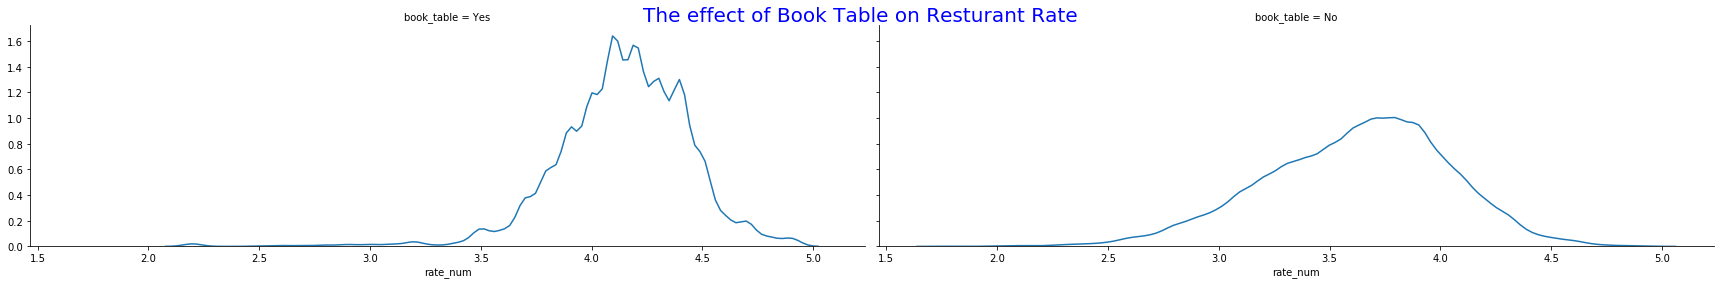

In [21]:
FaceGrid('book_table','rate_num','The effect of Book Table on Resturant Rate');



* Resturant with book table service always recieve highest rate

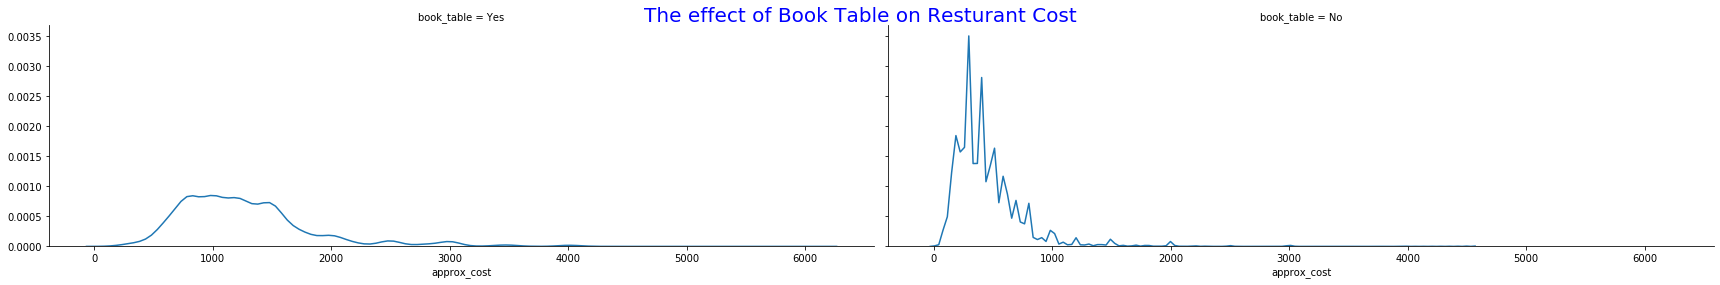

In [22]:
FaceGrid('book_table','approx_cost','The effect of Book Table on Resturant Cost');

* From here we can indicate that expenisive resturant usually have high rate


<a id="3.8"></a>
<font color="dimgrey" size=+2.0><b>3.8 Where are the best restaurants ?</b></font>



In [24]:
rest_location = df.groupby(by = 'location' , as_index = False).agg({'votes':'sum',
                                                           'url':'count',
                                                           'approx_cost':'mean'})
rest_location.columns = ['location', 'total_votes', 'total_branchies', 'mean_approx_cost']
rest_location = rest_location.sort_values(by='total_branchies', ascending=False)
rest_location = rest_location.loc[:, ['location', 'total_branchies', 'total_votes',
                                                'mean_approx_cost']]
rest_location.head(10)

,location,total_branchies,total_votes,mean_approx_cost
0,BTM,5124,619376,396.480973
22,HSR,2523,499720,475.610048
45,Koramangala 5th Block,2504,2219506,663.663845
29,JP Nagar,2235,586593,522.771300
89,Whitefield,2144,466829,598.152836
27,Indiranagar,2083,1196007,653.788027
32,Jayanagar,1926,488080,476.407716
56,Marathahalli,1846,445201,513.750683
3,Bannerghatta Road,1630,219077,443.679654
6,Bellandur,1286,206027,527.503888


Text(0, 0.5, 'Number of branchies')

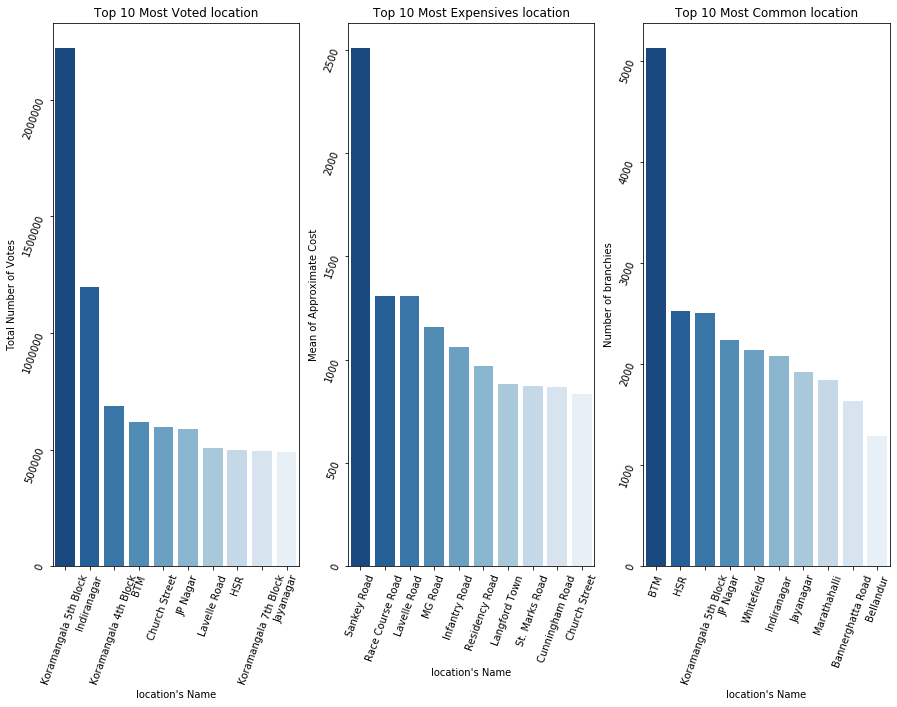

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15,10))
sns.barplot( x='location',y='total_votes', data=rest_location.sort_values(by='total_votes', ascending=False).head(10),
            ax=axs[0], palette='Blues_r')
axs[0].set_title('Top 10 Most Voted location', size=12)
axs[0].tick_params(labelrotation=70)
axs[0].set_xlabel('location\'s Name')
axs[0].set_ylabel('Total Number of Votes')
sns.barplot( x='location',y='mean_approx_cost', data=rest_location.sort_values(by='mean_approx_cost', ascending=False).head(10),
            ax=axs[1], palette='Blues_r')
axs[1].set_title('Top 10 Most Expensives location', size=12)
axs[1].tick_params(labelrotation=70)
axs[1].set_xlabel('location\'s Name')
axs[1].set_ylabel('Mean of Approximate Cost')
sns.barplot( x='location',y='total_branchies', data=rest_location.head(10),
            ax=axs[2], palette='Blues_r')
axs[2].set_title('Top 10 Most Common location', size=12)
axs[2].tick_params(labelrotation=70)
axs[2].set_xlabel('location\'s Name')
axs[2].set_ylabel('Number of branchies')

* as we can see here the most voted loaction is **Koramangala 5th Block**
* the most expensive loaction is **Sankey Road**
* the most Common loaction is **BTM**


<a id="3.9"></a>
<font color="dimgrey" size=+2.0><b>3.9 How are rate and cost affect on choosing best city to eat in it ?</b></font>

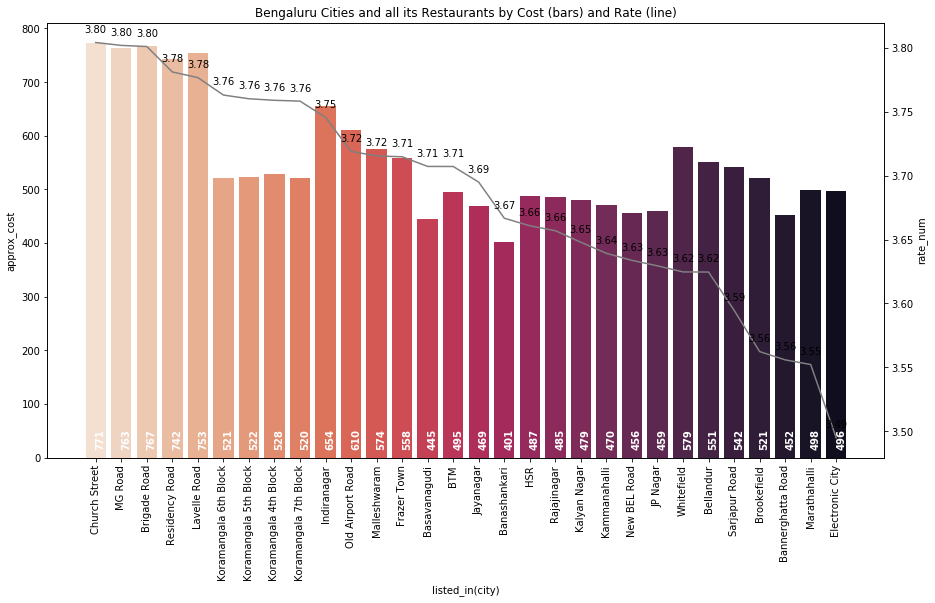

In [26]:
# Grouping data by city
city_group = df.groupby(by='listed_in(city)', as_index=False).agg({'rate_num': 'mean',
                                                                               'approx_cost': 'mean'})
city_group.sort_values(by='rate_num', ascending=False, inplace=True)

# Ploting
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='listed_in(city)', y='approx_cost', data=city_group, palette='rocket_r', 
            order=city_group['listed_in(city)'])
ax2 = ax.twinx()
sns.lineplot(x='listed_in(city)', y='rate_num', data=city_group, color='gray', ax=ax2, sort=False)

# Labeling line chart (rate)
xs = np.arange(0, len(city_group), 1)
ys = city_group['rate_num']
for x,y in zip(xs, ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')
    
# Labeling bar chart (cost)
for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{}'.format(int(y)), (x.mean(), 15), va='bottom', rotation='vertical', color='white', 
                fontweight='bold')

# Customizing chart

ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Bengaluru Cities and all its Restaurants by Cost (bars) and Rate (line)')
plt.show()

* Customers tend to go to cities which have high rate and almost have a regular cost

<a id="3.10"></a>
<font color="dimgrey" size=+2.0><b>3.10 Heatmap of restaurant count on each location</b></font>

### now let's extract location of cities using Geopy library

In [14]:
locations=pd.DataFrame({"Name":df['location'].unique()})
# locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]

In [15]:

geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

In [16]:
# locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

,Name,geo_loc
0,Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.9467026, 77.5300705)"
3,Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,"(12.9081487, 77.5553179)"


## Heatmap of restaurant count on each location

In [17]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

5124

In [18]:
def generateBaseMap(default_location=[12.9, 77.57], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [19]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [20]:
basemap

1. restaurants tend to concentrate in central Bengaluru 
2. The clutter of restaurants lowers are we move away from central.
3. So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4. Data Preparation</b></font>

<a id="4.1"></a>
<font color="dimgrey" size=+2.0><b>4.1 Clean Data</b></font>

In [34]:
# Check Null value
df.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
votes                  0
phone               1208
location              21
rest_type            227
dish_liked         28078
cuisines              45
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
approx_cost          346
rate_num           10052
dtype: int64

In [35]:
# fill Null value in approx_cost column
def fillnaOfCost(city):
    temp=df[df['listed_in(city)'] == city]
    temp_mean=temp['approx_cost'].mean()
    for i in range(len(df)):
        if np.isnan(df['approx_cost'].iloc[i]) == True and df['listed_in(city)'].iloc[i] == city:
                df['approx_cost'].iloc[i] = temp_mean

* To fill the NULL values in approx_cost, We classified data by City name 
* Then we got the mean for each approx_cost for the cities
* Finally we fill the NULL value by this mean

In [36]:
nan_cost_df=df[df['approx_cost'].isnull()== True]
nan_cities=nan_cost_df['listed_in(city)'].value_counts().keys().tolist()
for cities in nan_cities:
    fillnaOfCost(cities)

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
# Capping outliers in cost
percentiles = df['approx_cost'].quantile([0.01, 0.99]).values
df['approx_cost'][df['approx_cost'] <= percentiles[0]] = percentiles[0]
df['approx_cost'][df['approx_cost'] >= percentiles[1]] = percentiles[1]

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


* To deal with outliers in approx_cost, i used capping technique

<a id="4.2"></a>
<font color="dimgrey" size=+2.0><b>4.2 Feature Selection and Extarction</b></font>

* First we will select a good feature from our perspective 
* Following with extraction of new feature and encoding
* Then select best features uing Wrapper Methods

In [38]:
features = ['online_order','book_table','location','votes',
           'rest_type','cuisines','listed_in(type)','listed_in(city)','approx_cost','rate_num']

In [39]:
Train_df=df.loc[:, features]
Train_df.isna().sum()

online_order           0
book_table             0
location              21
votes                  0
rest_type            227
cuisines              45
listed_in(type)        0
listed_in(city)        0
approx_cost            0
rate_num           10052
dtype: int64

In [40]:
# split data into rated and unrated 
Train_df['rated']=Train_df['rate_num'].apply(lambda x: 1 if x >= 0 else 0)
Train_df_rated = Train_df[Train_df['rated']== 1]
Train_df_unrated = Train_df[Train_df['rated']== 0]

* Splliting data into rated and unrated depending on rate_num to use data of rated in trainning the model and unrated which has no rate_num to be as independent data using for future testing   
* Also I used this to deal with missing values in rated_num

In [41]:
# creating new Features
Train_df_rated['rest_type_count']=Train_df_rated['rest_type'].astype(str).apply(lambda x: len(x.split(',')))
Train_df_rated['cuisines_count']=Train_df_rated['cuisines'].astype(str).apply(lambda x: len(x.split(',')))

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


* Extracting new feature from resturant type and cuisines offered by counting each one of them

In [42]:
# Dropping data
Train_df_rated.drop('cuisines', axis=1, inplace=True)

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
Train_df_rated.head()

,online_order,book_table,location,votes,rest_type,listed_in(type),listed_in(city),approx_cost,rate_num,rated,rest_type_count,cuisines_count
0,Yes,Yes,Banashankari,775,Casual Dining,Buffet,Banashankari,800.0,4.1,1,1,3
1,Yes,No,Banashankari,787,Casual Dining,Buffet,Banashankari,800.0,4.1,1,1,3
2,Yes,No,Banashankari,918,"Cafe, Casual Dining",Buffet,Banashankari,800.0,3.8,1,2,3
3,No,No,Banashankari,88,Quick Bites,Buffet,Banashankari,300.0,3.7,1,1,2
4,No,No,Basavanagudi,166,Casual Dining,Buffet,Banashankari,600.0,3.8,1,1,2


In [44]:
def ReduceGranuality(currcol,newcol):
    Temp_count = list(df[currcol].value_counts().index)[:10]
    Train_df_rated[newcol] = Train_df_rated[currcol].apply(lambda x: x if x in Temp_count else 'Other')

In [45]:
# creating new Features
ReduceGranuality('location','location_features')
ReduceGranuality('listed_in(city)','cities_features')
ReduceGranuality('rest_type','rest_type_features')

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


* AS there is many numbers of location, cities and rest_type so, I choosed to select the top 10 repeated from them and classify the remaining to 'Other'

In [46]:
# Dropping data
Train_df_rated.drop('rest_type', axis=1, inplace=True)

In [47]:
Train_df_rated.isnull().sum()

online_order          0
book_table            0
location              0
votes                 0
listed_in(type)       0
listed_in(city)       0
approx_cost           0
rate_num              0
rated                 0
rest_type_count       0
cuisines_count        0
location_features     0
cities_features       0
rest_type_features    0
dtype: int64

* Now We have data cleaned from missing values and outlier

<a id="4.2.1"></a>
<font color="dimgrey" size=+2.0><b>4.2.1  Label Enconding</b></font>

In [48]:
# Splitting features by data type
cat_features= [col for col, dtype in Train_df_rated.dtypes.items() if dtype == 'object']
num_features = [col for col, dtype in Train_df_rated.dtypes.items() if dtype != 'object']
Train_df_rated_cat=Train_df_rated[cat_features]
for col in cat_features:
    col_encoded = pd.get_dummies(Train_df_rated_cat[col], prefix=col)
    Train_df_rated_cat = Train_df_rated_cat.merge(col_encoded, left_index=True, right_index=True)
    Train_df_rated_cat.drop(col, axis=1, inplace=True)


* Splitting data by data type into object and non object
* Then transfrom Object data using dummy variable technique 


In [49]:
Train_df=Train_df_rated.loc[:, num_features]
Train_df=Train_df.merge(Train_df_rated_cat, left_index=True, right_index=True)

 * Here we merge non object with object data type after tranformation

In [50]:
Train_df.shape

(41665, 172)

In [51]:
Train_df['target'] = Train_df['rate_num'].apply(lambda x: 1 if x >= 3.75 else 0)

* Creat new column called target and give value 1 to any rate greater than or equal to 3.75 and 0 value to rate less than 3.75 

In [52]:
# Dropping data
Train_df_rated.drop('rate_num', axis=1, inplace=True)

In [53]:
# splitting data into X ,y
X=Train_df.drop('target', axis=1)
y=Train_df['target'] # tagret data

In [54]:
# feture selection using Wrapper Method "Backward Elimination"
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


votes                                     1.115880e-30
approx_cost                               5.552797e-19
rate_num                                  0.000000e+00
rated                                     0.000000e+00
rest_type_count                           3.581041e-02
                                             ...      
rest_type_features_Delivery               2.168269e-47
rest_type_features_Dessert Parlor         1.060137e-15
rest_type_features_Other                  3.215622e-39
rest_type_features_Quick Bites           2.564292e-173
rest_type_features_Takeaway, Delivery     3.150677e-46
Length: 172, dtype: float64

In [55]:
# insert best feature in selected_features_BE to be used by the model
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py

['votes', 'approx_cost', 'rate_num', 'rated', 'cuisines_count', 'online_order_No', 'online_order_Yes', 'book_table_No', 'book_table_Yes', 'location_BTM', 'location_Banashankari', 'location_Bannerghatta Road', 'location_Basavanagudi', 'location_Bellandur', 'location_Bommanahalli', 'location_Brigade Road', 'location_Brookefield', 'location_CV Raman Nagar', 'location_Central Bangalore', 'location_Church Street', 'location_Commercial Street', 'location_Cunningham Road', 'location_Domlur', 'location_Ejipura', 'location_Frazer Town', 'location_HBR Layout', 'location_HSR', 'location_Hennur', 'location_Indiranagar', 'location_Infantry Road', 'location_JP Nagar', 'location_Jalahalli', 'location_Jayanagar', 'location_Jeevan Bhima Nagar', 'location_Kaggadasapura', 'location_Kalyan Nagar', 'location_Kammanahalli', 'location_Kanakapura Road', 'location_Kengeri', 'location_Koramangala', 'location_Koramangala 1st Block', 'location_Koramangala 3rd Block', 'location_Koramangala 4th Block', 'location_Ko

<a id="5"></a>
<font color="darkslateblue" size=+2.5><b>5. Machine Learning model </b></font>

In [56]:
# select best feature
X.loc[:,selected_features_BE]

,votes,approx_cost,rate_num,rated,cuisines_count,online_order_No,online_order_Yes,book_table_No,book_table_Yes,location_BTM,...,rest_type_features_Bar,rest_type_features_Beverage Shop,rest_type_features_Cafe,rest_type_features_Casual Dining,"rest_type_features_Casual Dining, Bar",rest_type_features_Delivery,rest_type_features_Dessert Parlor,rest_type_features_Other,rest_type_features_Quick Bites,"rest_type_features_Takeaway, Delivery"
0,775,800.0,4.1,1,3,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,787,800.0,4.1,1,3,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,918,800.0,3.8,1,3,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,88,300.0,3.7,1,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,166,600.0,3.8,1,2,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,34,800.0,3.7,1,2,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
51711,81,800.0,2.5,1,4,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
51712,27,1500.0,3.6,1,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
51715,236,2200.0,4.3,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


<a id="5.1"></a>
<font color="dimgrey" size=+2.0><b>5.1 Select best machine learning for binary classification </b></font>

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score

In [59]:
# Random Forest Classifier
clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [60]:
y_pred_rf=clf_RF.predict(X_test)

In [61]:
#Cross Validation 
from sklearn.model_selection import cross_val_score
clf_RF.fit(X_train, y_train)
score = cross_val_score(clf_RF , X , y, cv = 5)
print("Cross validation for RF is : ", score.mean())

Cross validation for RF is :  0.9305892235689427


* In Cross validation I used cross val score for all data set with k-fold = 5
* We get the mean of 5 folds score which is 97 % this an indication that the algorithm perform well 

In [62]:
# accuracy score for model evaluation
clf_RF_acc_score = accuracy_score(y_test, y_pred_rf)
clf_RF_acc_score

0.9205568222728909

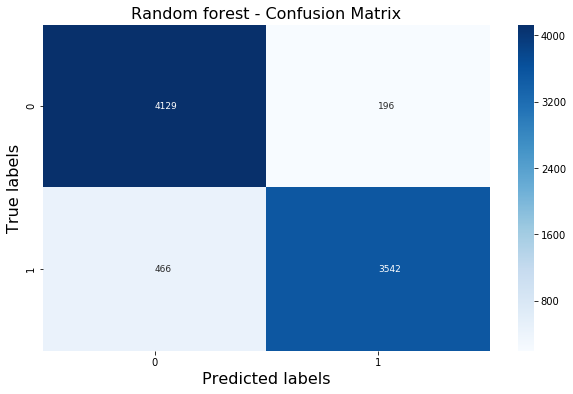

In [63]:
#Confusion matrix for model evaluation
cm = confusion_matrix(y_test, y_pred_rf)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16)
ax.set_ylabel('True labels',fontsize=16); 
ax.set_title('Random forest - Confusion Matrix',fontsize=16); 



In [64]:
# logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train) 
y_pred=logreg.predict(X_test)

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [65]:
score = cross_val_score(logreg , X , y, cv = 5)
print("Cross validation for Logistic Regression is : ", score.mean())

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Cross validation for Logistic Regression is :  0.8732509300372016


C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


* In Cross validation I used cross val score for all data set with k-fold = 5
* We get the mean of 5 folds score which is 89 % this an indication that Random forest classifier is better than Logistic Regression

In [66]:
# accuracy score for model evaluation
logreg_acc_score=accuracy_score(y_test, y_pred)
logreg_acc_score

0.8915156606264251

Confusion matrix is :
  [[3904  421]
 [ 483 3525]]


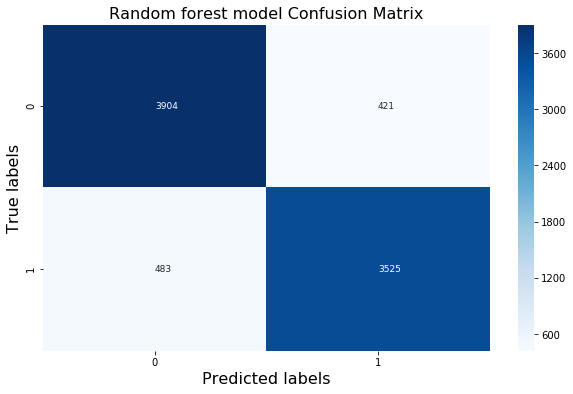

In [67]:
#Confusion matrix for model evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16)
ax.set_ylabel('True labels',fontsize=16); 
ax.set_title('Random forest model Confusion Matrix',fontsize=16); 

In [68]:
# Extra Trees Classifier
clf_ET=ExtraTreesClassifier()
clf_ET.fit(X_train,y_train)


ExtraTreesClassifier()

In [69]:
cv_ET_train = cross_val_score(clf_ET , X , y, cv = 5)
print("Cross validation ET is : ", cv_ET_train.mean())


Cross validation ET is :  0.9300372014880596


* In Cross validation I used cross val score for all data set with k-fold = 5
* We get the mean of 5 folds score which is 95 % this an indication that the algorithm perform well 

In [70]:
y_pred_ET = clf_ET.predict(X_test)
et_acc_score=accuracy_score(y_test, y_pred_ET)
et_acc_score

0.9831993279731189

Confusion matrix is :
  [[4257   68]
 [  72 3936]]


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

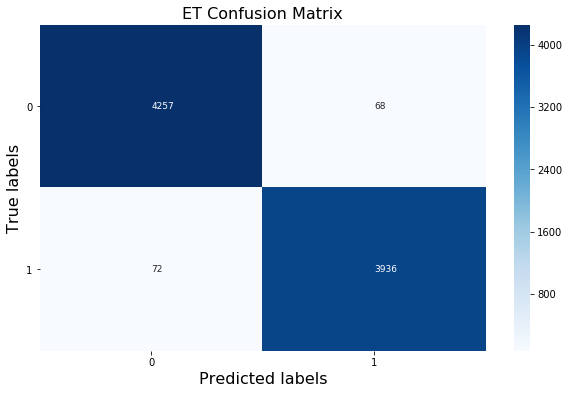

In [71]:
y_pred_ET=clf_ET.predict(X_test)
cm = confusion_matrix(y_test,y_pred_ET)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16)
ax.set_ylabel('True labels',fontsize=16); 
ax.set_title('ET Confusion Matrix',fontsize=16); 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10,rotation=0)

In [72]:
# comparsion between models
comp={'Models':['Random Forest Classifier','Logistic Regression','Extra Trees Classifier'],
     'Accuracy score':[clf_RF_acc_score,logreg_acc_score,et_acc_score]}
df_comp=pd.DataFrame(comp)
df_comp.sort_values(by='Accuracy score',ascending=False)

,Models,Accuracy score
2,Extra Trees Classifier,0.983199
0,Random Forest Classifier,0.920557
1,Logistic Regression,0.891516


* According to Comparision between model depending on accuracy score, We found that Extra Trees is best model so let's tune its parameters

<a id="5.2"></a>
<font color="dimgrey" size=+2.0><b>5.2 Parameter tuning </b></font>
* parameter tuning is an essential part of controlling the behavior of a machine learning model. If we don’t correctly tune our parameters, our estimated model parameters produce suboptimal results, as they don’t minimize the loss function. This means our model makes more errors. In practice, key indicators like the accuracy or the confusion matrix will be worse.

In [73]:
from sklearn.model_selection import GridSearchCV


In [74]:
params = [{'n_estimators': [100, 120, 140, 160, 180, 200],
         'criterion': ['gini', 'entropy','log_loss'],
         'max_depth':  [3, 5, 10, 20, 50]}]

In [75]:
# Grid Search SV for Tune Extra Trees parameters
gs_et = GridSearchCV(clf_ET,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_et.fit(X_train, y_train)


C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [3, 5, 10, 20, 50],
                          'n_estimators': [100, 120, 140, 160, 180, 200]}],
             scoring='accuracy')

In [76]:
gs_et.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 200}

* Using Grid search technique to Tune parameter of EXtra tree by choosing the best parameter between n_estimators,criterion and max depth 
* After tunning we found the best parameter is entropy for criterion, 50 max depth and 140 n estimators

In [77]:

gs_et.score(X_train, y_train)

1.0

* combination of parameters produced an accuracy score of 1

In [78]:
# Extra tree Classifier with best parameters
clf_ET=ExtraTreesClassifier(criterion='entropy',max_depth=50,n_estimators=140)
clf_ET.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=50, n_estimators=140)

In [79]:
cv_ET_train = cross_val_score(clf_ET , X , y, cv = 5)
print("Cross validation for ET  is : ", cv_ET_train.mean())

Cross validation for ET  is :  0.9322692907716309


<a id="5.3"></a>
<font color="dimgrey" size=+2.0><b>5.3 Evalution and mertcis </b></font>

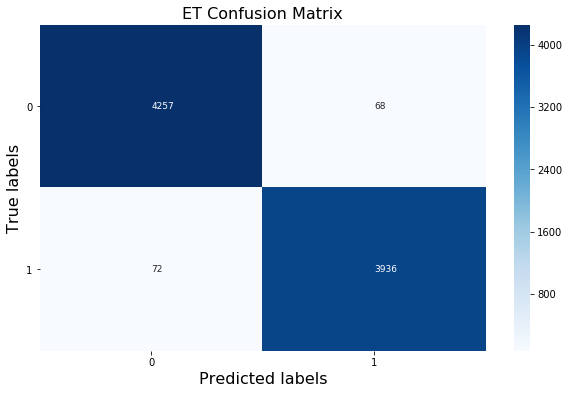

In [80]:
y_pred_ET=clf_ET.predict(X_test)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16)
ax.set_ylabel('True labels',fontsize=16); 
ax.set_title('ET Confusion Matrix',fontsize=16); 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10,rotation=0)
plt.show();

* confusion matrix is a performance measurement for machine learning classification problem
* Here our confusion matrix show a good result about machine learning model
* confusion matrix is very important as it used for measuring Recall, Precision, Accuracy

In [82]:
print('Precision: %.3f' % precision_score(y_test, y_pred_ET))
print('Recall: %.3f' % recall_score(y_test, y_pred_ET))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_ET))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_ET))

Precision: 0.988
Recall: 0.982
Accuracy: 0.986
F1 Score: 0.985


* Here are precision,recall, F1-Score and Accuracy and the above are the value for each one which indiacate that Moldel perform well
* To avoid misleading accuracy, I decided to use Roc Curve to improve the accuracy of model

In [85]:
from sklearn.metrics import  roc_curve,roc_auc_score

In [86]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_ET)

In [87]:
print('roc_auc_score for ExtraTree: ', roc_auc_score(y_test, y_pred_ET))

roc_auc_score for ExtraTree:  0.9854596875612935


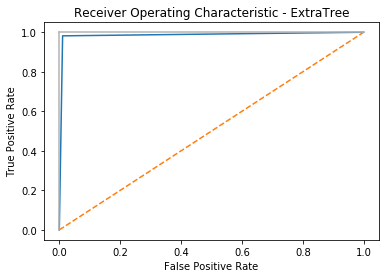

In [88]:
plt.title('Receiver Operating Characteristic - ExtraTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* After all this evaluation we can now say the Extra trees calssifier model'paratmeter are tunned well and has a good accuracy score

<a id="6"></a>
<font color="darkslateblue" size=+2.5><b>6. Summary </b></font>

#### My conclusion for zomato dataset:
* approximate cost and votes are the most Two variables has effect on restaurant successful
* Restaurants with Book Table service are more important than Online service and have high rated
* The top restaurant type is Quick bites
* the most common cuisine is north Indian
* The most popular restaurants
   - Onesta has max vote
   - Le Cirque Signature - The Leela Palace is The most expensive
   - Cafe Coffee Day is The most common one
* Book table service has an effect on both rate and cost
* BTM is the best location to find a restaurant
* Koramangala 5th Block is the best location to find most voted restaurants
* Sankey Roads the best location Where the most expensive restaurants exists
* BTW is the most common location to found a restaurants
* Quick Bites is the preferred type in Bengaluru
* North Indian cuisine type is the most common one in Bengaluru
* **For New Restaurants in order to have a good Compete with other restaurants**
    - Caring about rate and cost should be top priority
    - Your restaurant should have a book table and might have online ordering as this increase your rate among the others
    - You should start in any location of the top 10 common location then after your rating is raised up you could    establish a new branch in the top 10 most voted location 
    - Choose type of your restaurant from top ten restaurant and top ten cuisine type in Bengaluru 